In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

#Visualization Tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# AI Workflow Module
from model_classifier import ModelClassifier, CustomClassifier

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Use for saving model 
import joblib

# Environment Parameters

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100 
plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Preparation

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled_v0.csv',index_col=0)
train_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled_v0.csv',index_col=0)
test_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,...,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,ajcc_pathologic_stage_Stage IIIA,ajcc_pathologic_stage_Stage IIIB,ajcc_pathologic_stage_Stage IIIC,ajcc_pathologic_stage_Stage IV,tumor_stage_stage 0,tumor_stage_stage i,tumor_stage_stage ia,tumor_stage_stage ib,tumor_stage_stage ii,tumor_stage_stage iia,tumor_stage_stage iib,tumor_stage_stage iic,tumor_stage_stage iii,tumor_stage_stage iiia,tumor_stage_stage iiib,tumor_stage_stage iiic,tumor_stage_stage iv,ajcc_pathologic_t_T1,ajcc_pathologic_t_T1a,ajcc_pathologic_t_T1b,ajcc_pathologic_t_T2,ajcc_pathologic_t_T2a,ajcc_pathologic_t_T2b,ajcc_pathologic_t_T3,ajcc_pathologic_t_T3a,ajcc_pathologic_t_T3b,ajcc_pathologic_t_T4,ajcc_pathologic_t_T4a,ajcc_pathologic_t_T4b,ajcc_pathologic_t_TX,ajcc_pathologic_t_Tis,ajcc_pathologic_n_N1,ajcc_pathologic_n_N1a,ajcc_pathologic_n_N1b,ajcc_pathologic_n_N2,ajcc_pathologic_n_N

In [4]:
# Get genes
features_df = pd.read_csv('../data/Melanoma_RF_weights_all_genomic_data.csv',index_col=0)
features_df.head(10)

,weights
C7,0.159056
KRT17,0.102874
CLEC2A,0.091171
S100A7A,0.064637
KRTDAP,0.060437
WFDC5,0.041753
KRT6B,0.038876
S100A7,0.024198
KRT14,0.019587
PVRL4,0.017585


### Feature Selection

In [5]:
top10_features = features_df.weights.head(10).index.values
top20_features = features_df.weights.head(20).index.values
top30_features = features_df.weights.head(30).index.values
top40_features = features_df.weights.head(40).index.values
top50_features = features_df.weights.head(50).index.values

## Model Development

In [6]:
# Logistic Regression

lr_pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    }
]

# Support Vector Machines - Linear Kernel

svm_linear_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    }
]

# Support Vector Machines - Polynomial Kernel

svm_poly_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Radial Basis Kernel


svm_rbf_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Sigmoid Kernel


svm_sigmoid_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Naive Bayes

gnb_pipeline_params = [
    {   
        'clf__estimator': [GaussianNB(priors = None)], 
    },
]

# Random Forest

rf_pipeline_params = [
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]  
    },
]

# All Models in one pipeline without PCA

pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

# All Models in one pipeline with PCA


pca_pipeline_params = [
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],        
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': [10.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': [0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [RandomForestClassifier(random_state=1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

### Model Performance [Without PCA]

#### Support Vector Machines - Radial Basis Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.912):
{'clf__estimator': SVC(decision_function_shape='ovo', gamma=1, probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 1}

Training Performance:
AUC score: 0.9248515920129521
LogLoss score: 0.33097263619794404
Accuracy: 0.8776223776223776
f1 macro: 0.801652565042503
f1 micro: 0.8776223776223775
f1 weighted: 0.8660337621440918
Precision macro: 0.8714284404979031
Precision micro: 0.8714284404979031
Precision weighted: 0.8714284404979031
Recall macro: 0.7628845116028062
Recall micro: 0.8776223776223776
Recall weighted: 0.8776223776223776

Validation Performance:
AUC score: 0.950476889214967
LogLoss score: 0.3501911052124778
Accuracy: 0.8536585365853658
f1 macro: 0.7593478260869565
f1 micro: 0.8536585365853658
f1 weighted: 0.8389607635206788
Precision macro: 0.8554821748538642
Precision micro: 0.8554821748538642
Precision weighted: 0.8554821748538642
Recall ma

['melanoma_rf_svm_radial_10_genes_classifier.pkl']

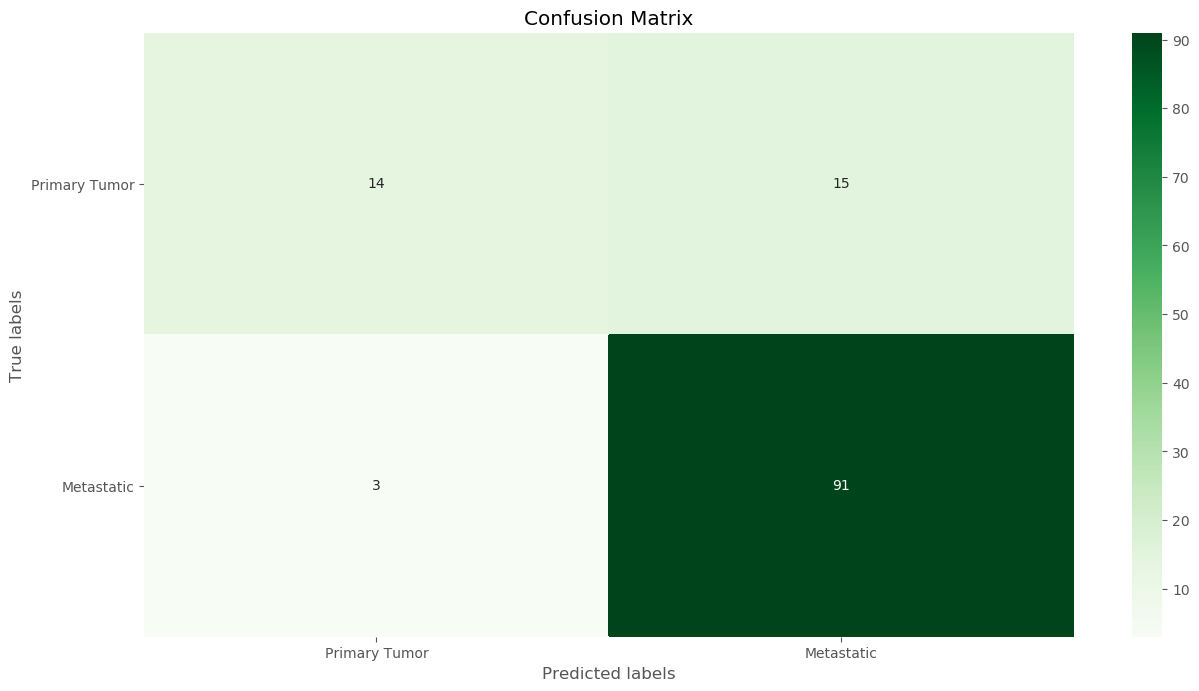

In [7]:
model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = top10_features, 
    label_binarizer = False)


grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_rbf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

joblib.dump(model, 'melanoma_rf_svm_radial_10_genes_classifier.pkl', compress=9)

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.881):
{'clf__estimator': SVC(decision_function_shape='ovo', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 'scale'}

Training Performance:
AUC score: 0.9313275769023206
LogLoss score: 0.2781583116395168
Accuracy: 0.8706293706293706
f1 macro: 0.7775535515334973
f1 micro: 0.8706293706293706
f1 weighted: 0.8530204318815028
Precision macro: 0.8572695752592043
Precision micro: 0.8572695752592043
Precision weighted: 0.8572695752592043
Recall macro: 0.7330005396654075
Recall micro: 0.8706293706293706
Recall weighted: 0.8706293706293706

Validation Performance:
AUC score: 0.9332355099046221
LogLoss score: 0.30238991411300165
Accuracy: 0.8536585365853658
f1 macro: 0.7509000900090008
f1 micro: 0.8536585365853658
f1 weighted: 0.835448178964238
Precision macro: 0.8499875069672682
Precision micro: 0.8499875069672682
Precision weighted: 0.8499875069672682
Recall macr

['melanoma_rf_svm_radial_20_genes_classifier.pkl']

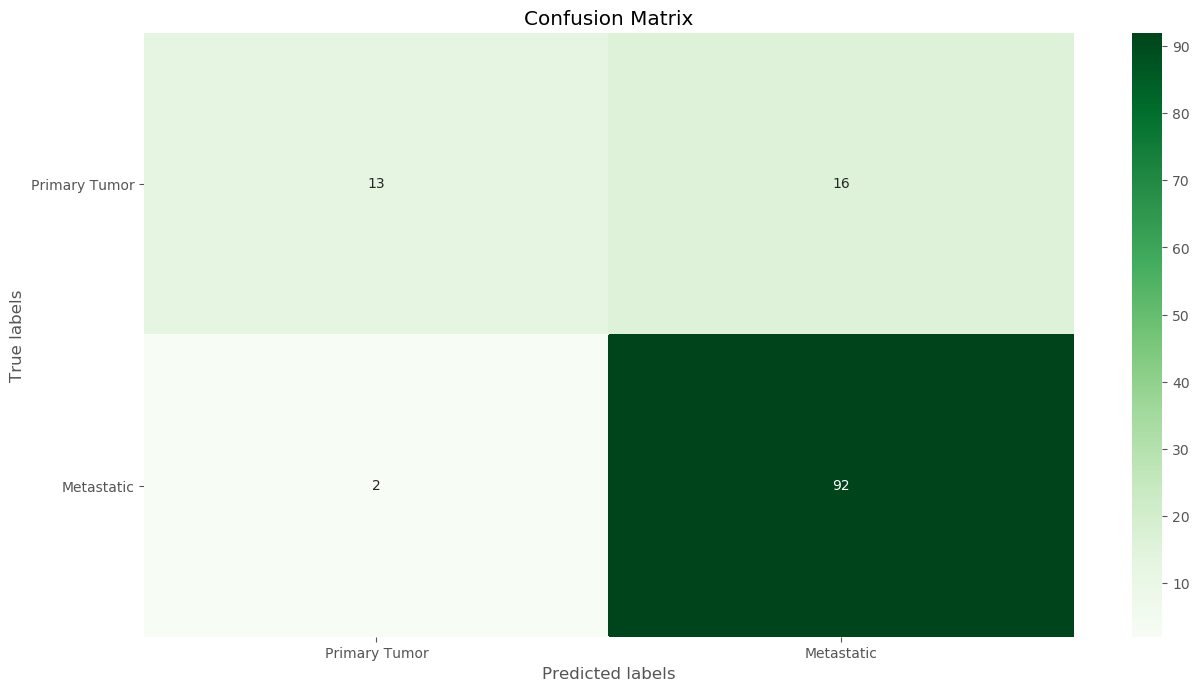

In [8]:
model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = top20_features, 
    label_binarizer = False)

grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_rbf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

joblib.dump(model, 'melanoma_rf_svm_radial_20_genes_classifier.pkl', compress=9)

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.891):
{'clf__estimator': SVC(decision_function_shape='ovo', gamma=0.01, probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 0.01}

Training Performance:
AUC score: 0.9252563410685376
LogLoss score: 0.2928818979491796
Accuracy: 0.8566433566433567
f1 macro: 0.7412335871124351
f1 micro: 0.8566433566433567
f1 weighted: 0.8318695317702269
Precision macro: 0.8416988416988417
Precision micro: 0.8416988416988417
Precision weighted: 0.8416988416988417
Recall macro: 0.6985294117647058
Recall micro: 0.8566433566433567
Recall weighted: 0.8566433566433567

Validation Performance:
AUC score: 0.9071900220102714
LogLoss score: 0.3184665142608945
Accuracy: 0.8617886178861789
f1 macro: 0.7604536602130829
f1 micro: 0.861788617886179
f1 weighted: 0.8427883133224734
Precision macro: 0.8522643776115684
Precision micro: 0.8522643776115684
Precision weighted: 0.8522643776115684
Rec

['melanoma_rf_svm_radial_30_genes_classifier.pkl']

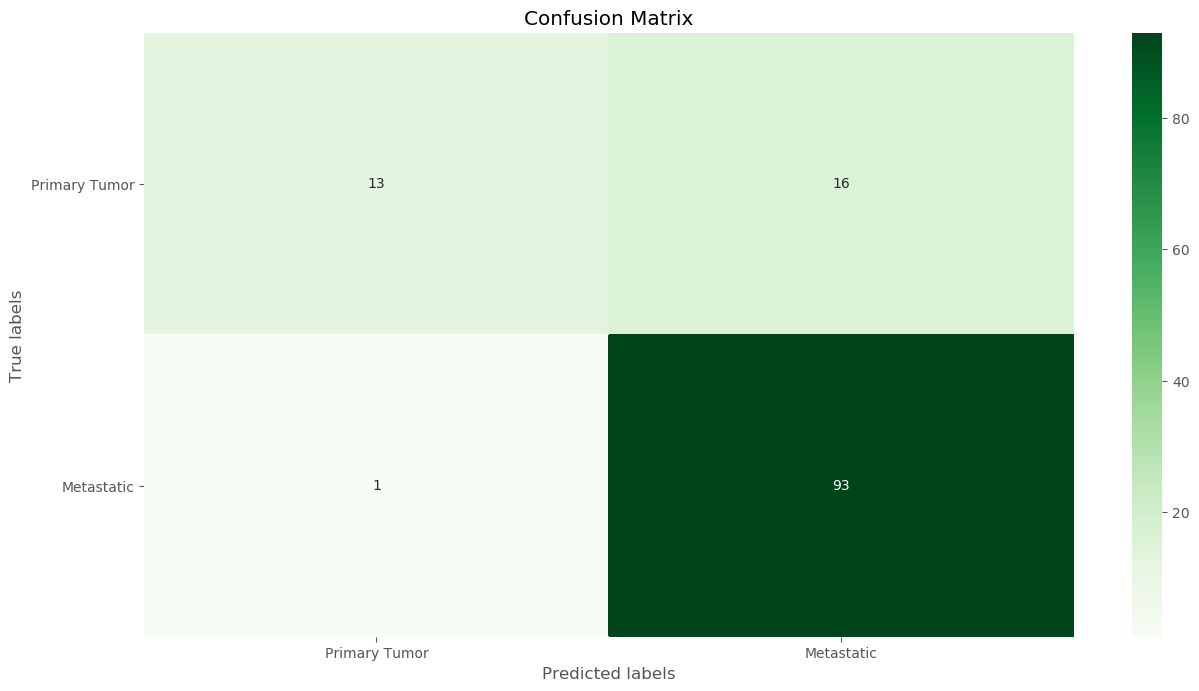

In [9]:
model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = top30_features, 
    label_binarizer = False)

grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_rbf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

joblib.dump(model, 'melanoma_rf_svm_radial_30_genes_classifier.pkl', compress=9)

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.883):
{'clf__estimator': SVC(decision_function_shape='ovo', gamma=0.01, probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 0.01}

Training Performance:
AUC score: 0.9481246627091202
LogLoss score: 0.2628601911832988
Accuracy: 0.8601398601398601
f1 macro: 0.7537242745199346
f1 micro: 0.8601398601398601
f1 weighted: 0.8386303268762583
Precision macro: 0.8472644220744852
Precision micro: 0.8472644220744852
Precision weighted: 0.8472644220744852
Recall macro: 0.7109417161359957
Recall micro: 0.8601398601398601
Recall weighted: 0.8601398601398601

Validation Performance:
AUC score: 0.9101247248716067
LogLoss score: 0.3032232604224022
Accuracy: 0.8536585365853658
f1 macro: 0.7415966386554622
f1 micro: 0.8536585365853658
f1 weighted: 0.8315228530436566
Precision macro: 0.8445904294632888
Precision micro: 0.8445904294632888
Precision weighted: 0.8445904294632888
Re

['melanoma_rf_svm_radial_40_genes_classifier.pkl']

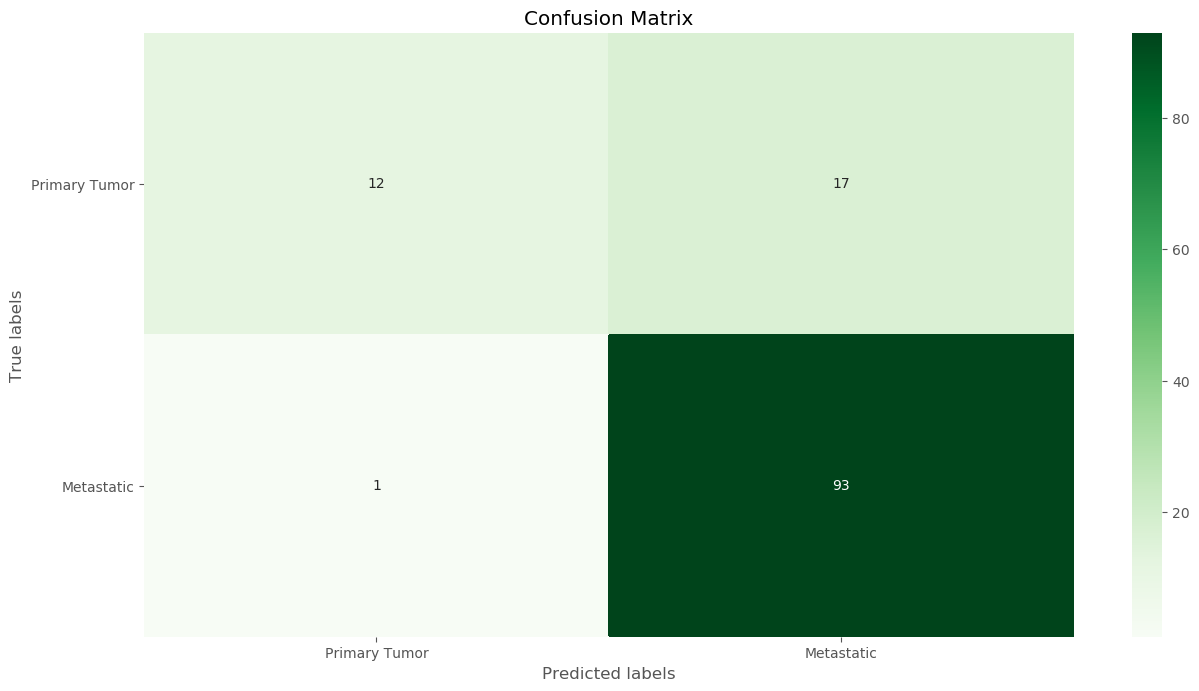

In [10]:
model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = top40_features, 
    label_binarizer = False)

grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_rbf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

joblib.dump(model, 'melanoma_rf_svm_radial_40_genes_classifier.pkl', compress=9)

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.879):
{'clf__estimator': SVC(decision_function_shape='ovo', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 'scale'}

Training Performance:
AUC score: 0.9689017808958446
LogLoss score: 0.19785863606866547
Accuracy: 0.9230769230769231
f1 macro: 0.8810496067755595
f1 micro: 0.9230769230769231
f1 weighted: 0.9181325329238215
Precision macro: 0.9110788024711391
Precision micro: 0.9110788024711391
Precision weighted: 0.9110788024711391
Recall macro: 0.8432946573124662
Recall micro: 0.9230769230769231
Recall weighted: 0.9230769230769231

Validation Performance:
AUC score: 0.9233308877476155
LogLoss score: 0.28587684036790595
Accuracy: 0.8455284552845529
f1 macro: 0.7322717378852102
f1 micro: 0.845528455284553
f1 weighted: 0.8242928207721761
Precision macro: 0.8423386322483174
Precision micro: 0.8423386322483174
Precision weighted: 0.8423386322483174
Recall mac

['melanoma_rf_svm_radial_50_genes_classifier.pkl']

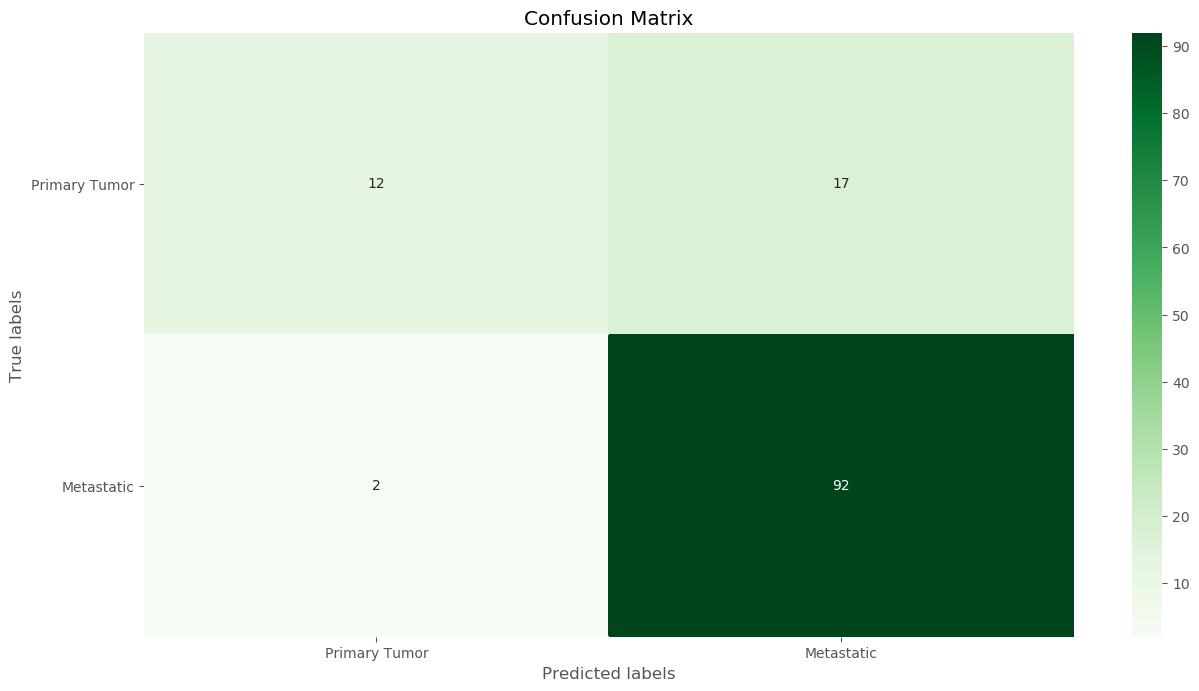

In [11]:
model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = top50_features, 
    label_binarizer = False)

grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_rbf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

joblib.dump(model, 'melanoma_rf_svm_radial_50_genes_classifier.pkl', compress=9)